In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

Пусть $x_1, . . . , x_n ∼ U([0; θ_0]),\ θ_0 > 0$. Известно, что ОМП для параметра $θ_0$ равна $\hat{θ}_n = max(x_i)$

Скорость сходимости оценки $\hat{θ}_n$ к истинному значению параметра $θ_0$:
$$
p(|\theta_0 - X_{max}|\geq \varepsilon) = (\frac{\theta_0-\varepsilon}{\theta_0})^n
$$

In [34]:
epsilon = 0.1
theta = 10
n_list = range(1, 501, 10)
tries = 100

In [56]:
rates = np.zeros(len(n_list))
for i, n in enumerate(n_list):
    max_list = np.zeros(tries)
    for j in range(tries):
        uniform_samples = np.random.uniform(0, theta, n)
        max_list[j] = uniform_samples.max()
    rate = sum(np.abs(theta-max_list)>=epsilon)/tries
    rates[i] = rate
theoritical_rate = np.power(((theta-epsilon)/theta), n_list)

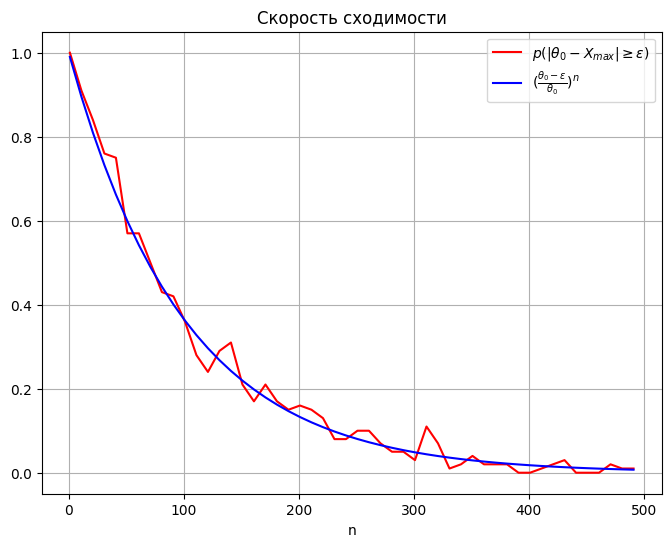

In [57]:
plt.figure(figsize=(8, 6))
plt.plot(n_list, rates, label=r'$p(|\theta_0 - X_{max}|\geq \varepsilon)$', color='red')
plt.plot(n_list, theoritical_rate, label=r'$(\frac{\theta_0-\varepsilon}{\theta_0})^n$', color='blue')
plt.xlabel('n')
plt.title(r'Скорость сходимости')
plt.grid(True)
plt.legend()
plt.show()

Видно, что разница $|\theta_0 - X_{max}|$ постепенно по $(\frac{\theta_0-\varepsilon}{\theta_0})^n$ сходится к 0.

Такая оценка асимптотически несмещенная:
$$
E(X_{max})=\frac{n}{n+1}\theta_0\\
E(X_{max})\xrightarrow[n\rightarrow \infty]{} \theta_0
$$

In [89]:
n_list = np.arange(2, 1002, 10)
E_max = np.zeros(len(n_list))
for i, n in enumerate(n_list):
    max_list = np.zeros(tries)
    for j in range(tries):
        uniform_samples = np.random.uniform(0, theta, n)
        max_list[j] = uniform_samples.max()
    max_val = sum(max_list)/tries
    E_max[i] = max_val
theoritical_E = (n_list/(n_list+1))*theta

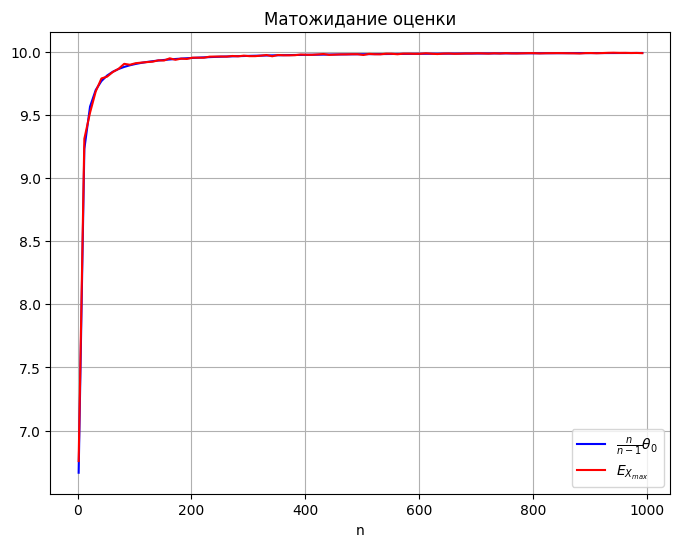

In [90]:
plt.figure(figsize=(8, 6))
plt.plot(n_list, theoritical_E, label=r'$\frac{n}{n-1}\theta_0$', color='blue')
plt.plot(n_list, E_max, label=r'$E_{X_{max}}$', color='red')
plt.xlabel('n')
plt.title(r'Матожидание оценки')
plt.grid(True)
plt.legend()
plt.show()

Видно, что теоретическое значение и фактическое значение практически совпадают. Когда n приближается к бесконечности, $X_{max}=\theta_0$.